In [89]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('Test_Sales_LinReg.csv')
data

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6
...,...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9,15.9
301,18.7,12.1,23.7,23.4,18.7,6.7
302,39.5,41.1,17.6,5.8,39.5,10.8
303,75.5,10.8,8.3,6.0,75.5,9.9


In [6]:
data.shape

(305, 6)

In [7]:
data.isnull().sum()

Republic    10
NDTV         5
TV5          0
TV9          8
AajTak       5
sales        0
dtype: int64

In [8]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [13]:
data['Republic']=data['Republic'].fillna(data['Republic'].mean())
data['NDTV']=data['NDTV'].fillna(data['NDTV'].mean())
data['TV9']=data['TV9'].fillna(data['TV9'].mean())
data['AajTak']=data['AajTak'].fillna(data['AajTak'].mean())

In [14]:
data.isnull().sum()

Republic    0
NDTV        0
TV5         0
TV9         0
AajTak      0
sales       0
dtype: int64

In [15]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,85.881799,14.659861,20.290023,21.127576,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


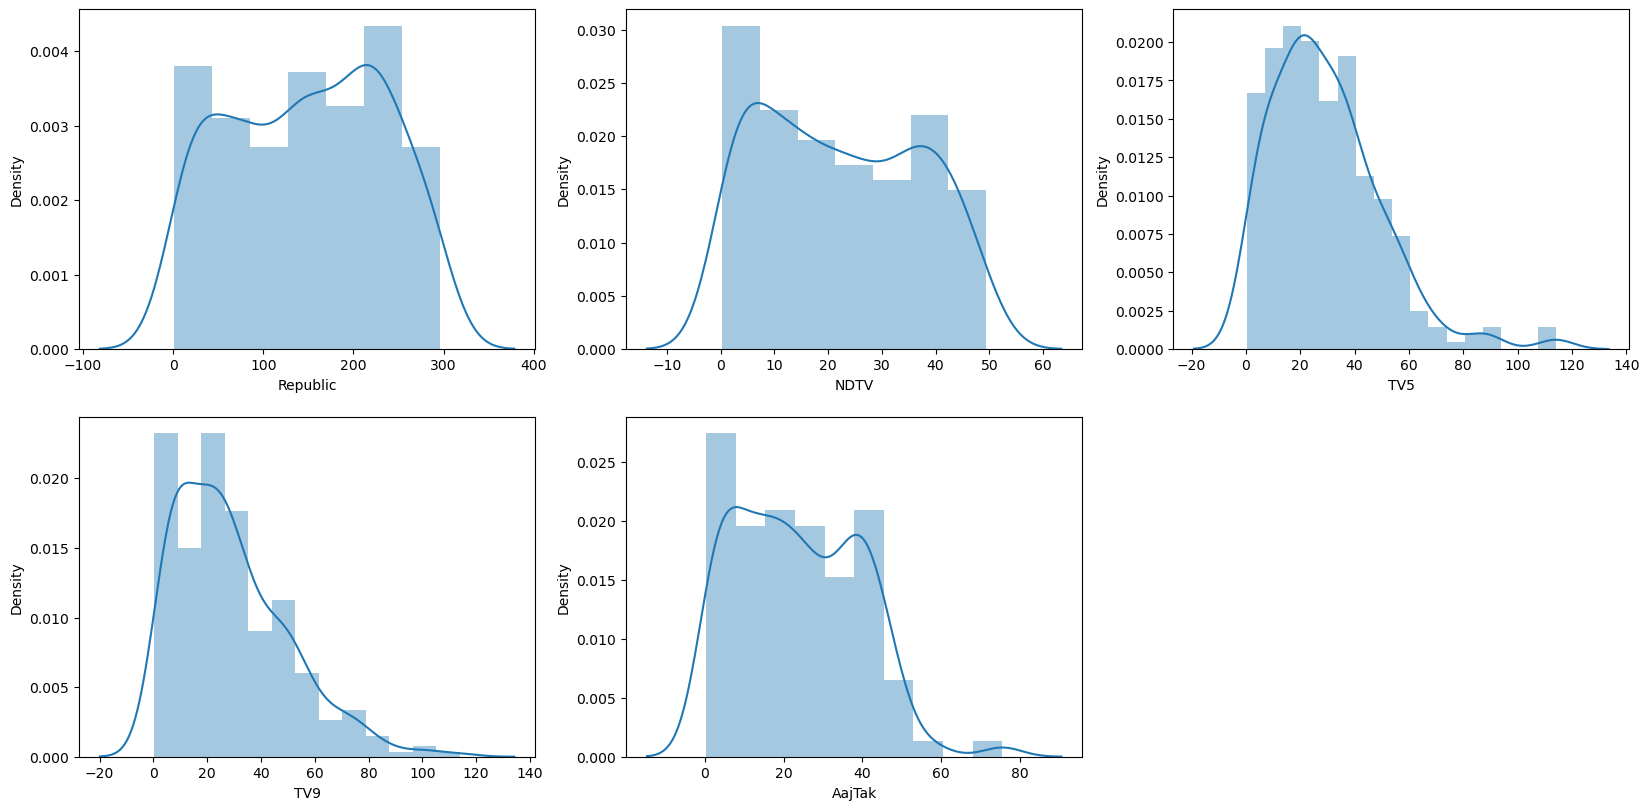

In [25]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in data:
    if plotnumber<6:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.show()

In [26]:
outliers=data.drop(columns='sales')

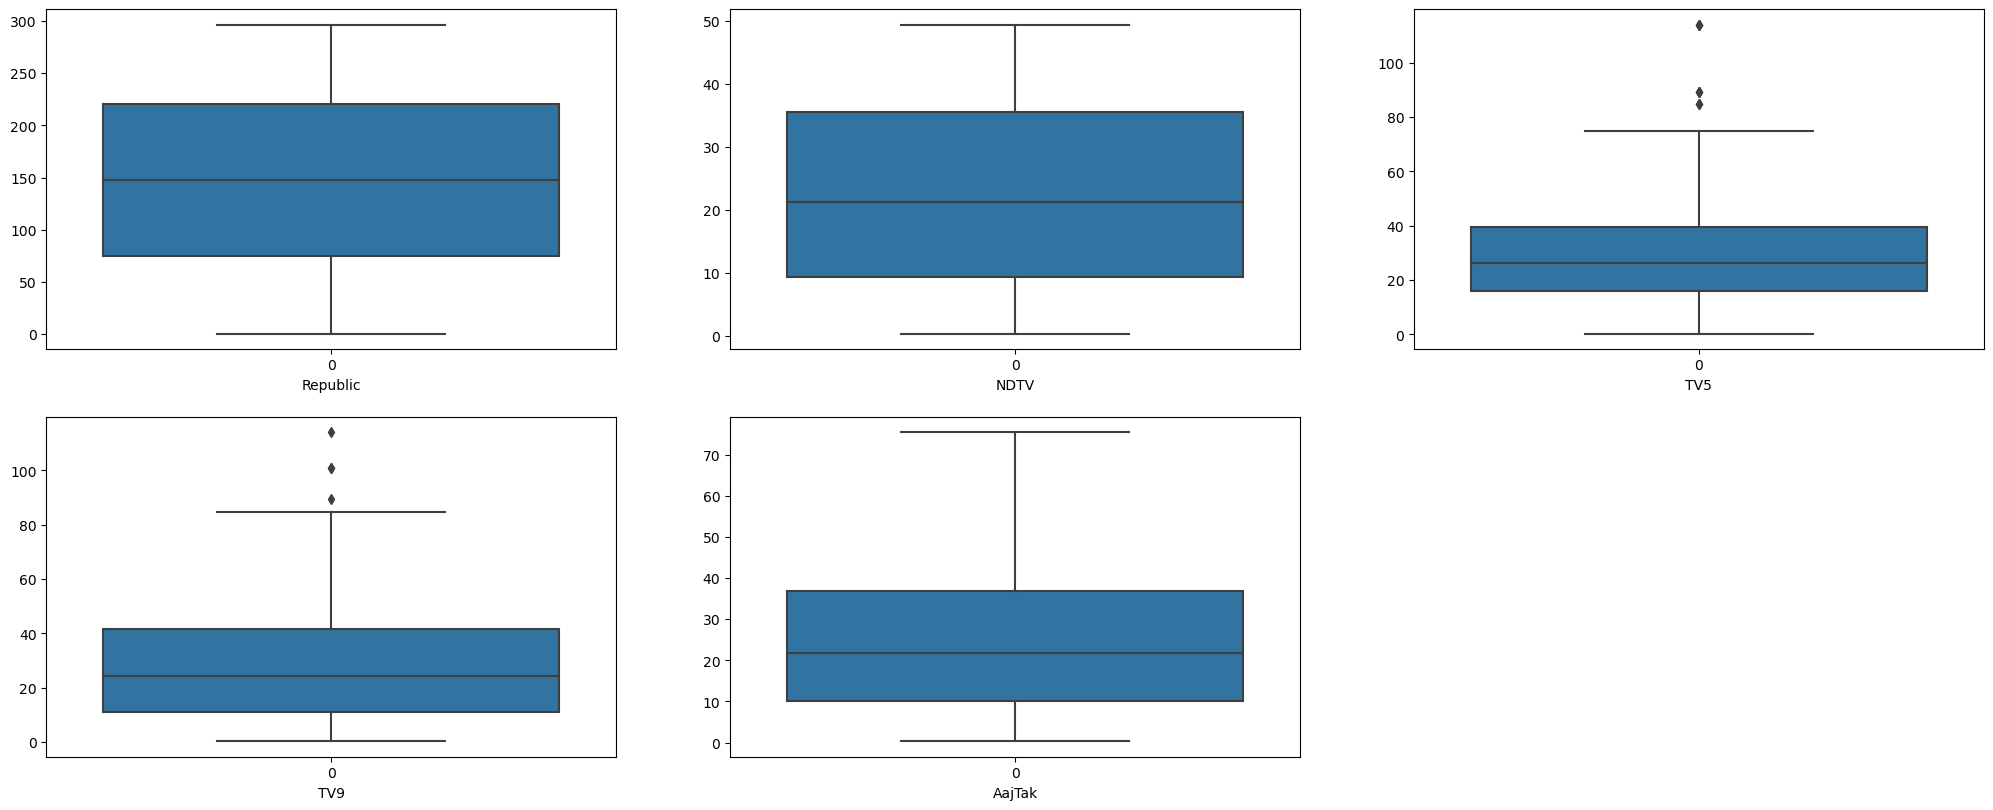

In [27]:
plt.figure(figsize=(25,15))
plotnumber=1

for column in outliers:
    if plotnumber<6:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data=outliers[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [28]:
q3=data.quantile(0.75)
q1=data.quantile(0.25)
iqr=q3-q1

In [29]:
high_tvs=(q3.TV5+(1.5*iqr.TV5))
high_tvs

75.15

In [30]:
index_tvs=np.where(data['TV5']>high_tvs)
index_tvs

(array([  5,  55,  83, 142, 162, 193, 252, 272], dtype=int64),)

In [31]:
data=data.drop(data.index[index_tvs])
data

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6
...,...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9,15.9
301,18.7,12.1,23.7,23.4,18.7,6.7
302,39.5,41.1,17.6,5.8,39.5,10.8
303,75.5,10.8,8.3,6.0,75.5,9.9


In [32]:
data.reset_index()

,index,Republic,NDTV,TV5,TV9,AajTak,sales
0,0,8.7,48.9,4.0,75.0,49.0,7.2
1,1,57.5,32.8,65.9,23.5,57.5,11.8
2,2,120.2,19.6,7.2,11.6,18.5,13.2
3,3,8.6,2.1,46.0,1.0,2.6,4.8
4,4,199.8,2.6,52.9,21.2,2.9,10.6
...,...,...,...,...,...,...,...
292,300,286.0,13.9,35.2,3.7,13.9,15.9
293,301,18.7,12.1,23.7,23.4,18.7,6.7
294,302,39.5,41.1,17.6,5.8,39.5,10.8
295,303,75.5,10.8,8.3,6.0,75.5,9.9


In [33]:
high_tv9=(q3.TV9+(iqr.TV9))
high_tv9

72.6

In [34]:
index_tv9=np.where(data['TV9']>high_tv9)
index_tv9

(array([  0,  10,  59,  72,  84, 101, 124, 147, 191, 208, 214, 231, 254],
       dtype=int64),)

In [35]:
data=data.drop(data.index[index_tv9])
data

,Republic,NDTV,TV5,TV9,AajTak,sales
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6
6,214.7,24.0,55.8,4.0,26.0,17.4
...,...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9,15.9
301,18.7,12.1,23.7,23.4,18.7,6.7
302,39.5,41.1,17.6,5.8,39.5,10.8
303,75.5,10.8,8.3,6.0,75.5,9.9


In [36]:
data.reset_index()

,index,Republic,NDTV,TV5,TV9,AajTak,sales
0,1,57.5,32.8,65.9,23.5,57.5,11.8
1,2,120.2,19.6,7.2,11.6,18.5,13.2
2,3,8.6,2.1,46.0,1.0,2.6,4.8
3,4,199.8,2.6,52.9,21.2,2.9,10.6
4,6,214.7,24.0,55.8,4.0,26.0,17.4
...,...,...,...,...,...,...,...
279,300,286.0,13.9,35.2,3.7,13.9,15.9
280,301,18.7,12.1,23.7,23.4,18.7,6.7
281,302,39.5,41.1,17.6,5.8,39.5,10.8
282,303,75.5,10.8,8.3,6.0,75.5,9.9


In [37]:
x=data.drop(columns='sales')
y=data.sales

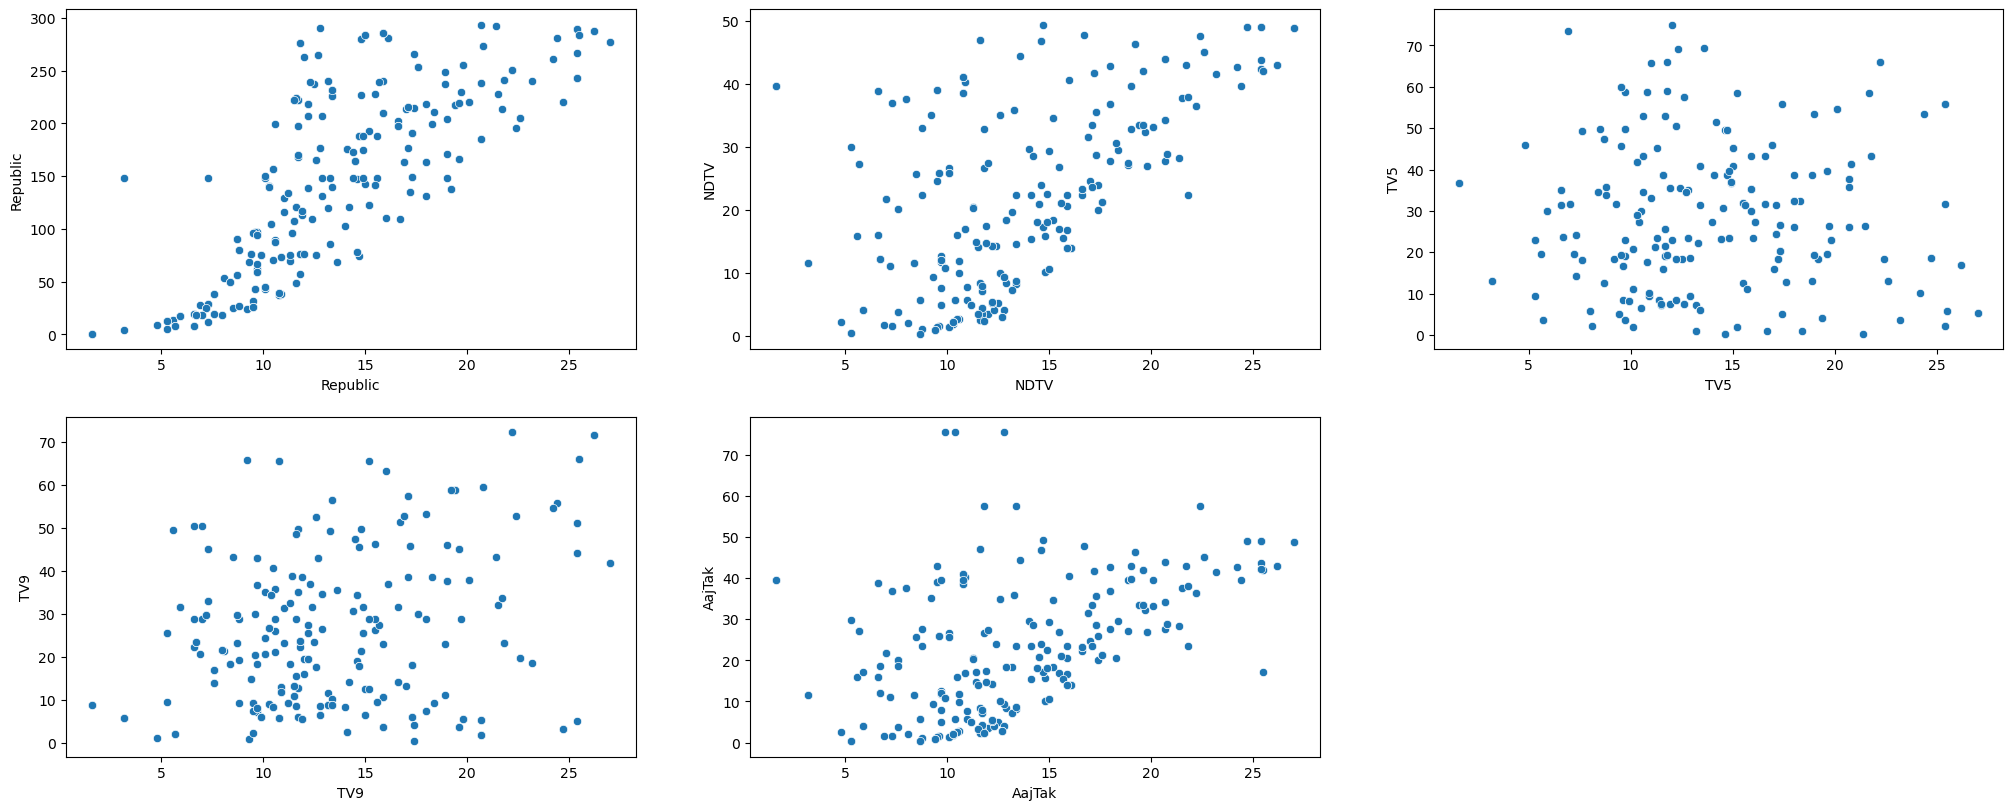

In [39]:
plt.figure(figsize=(25,15))
plotnumber=1

for column in x:
    if plotnumber<6:
        ax=plt.subplot(3,3,plotnumber)
        sns.scatterplot(x=y,y=x[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [40]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(x)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y,test_size=0.25,random_state=101)

In [63]:
log_reg=LinearRegression()
log_reg.fit(x_train,y_train)

LinearRegression()

13.623910575287026
[ 3.80468302e+00  2.33026708e+00 -1.89195596e-03  2.58568121e-01
  3.94658666e-01]


In [91]:
#adjusted R2 score
log_reg.score(x_train,y_train)

0.8797480982053153

In [90]:
log_reg.score(x_test,y_test)

0.8495302555858107

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scalar,i)for i in range (x_scalar.shape[1])]
vif['features']=x.columns
vif

#as vif is < 5 then there is no multicollinear issue 

,vif,features
0,1.024884,Republic
1,4.050174,NDTV
2,1.021361,TV5
3,1.107073,TV9
4,3.895382,AajTak


In [75]:
x_test[1]

array([ 0.20699996, -0.05528071,  0.19671371,  1.19108746, -0.13418506])

In [92]:
y_pred=log_reg.predict(x_test)

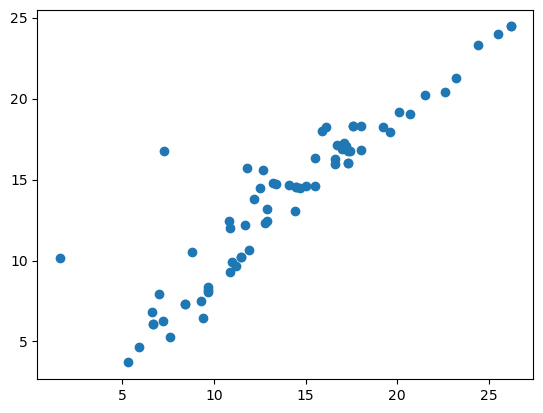

In [94]:
plt.scatter(y_test,y_pred)
plt.show()

In [95]:
mean_absolute_error(y_test,y_pred)

1.399430505723467

In [96]:
mean_squared_error(y_test,y_pred)

4.177621567072626

In [97]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.043923082474638